In [1]:
# Remove unwanted warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Data Management
import pandas as pd
import numpy as np

from ta import add_all_ta_features

# Statistics
from statsmodels.tsa.stattools import adfuller

# Unsupervised Machine Learning
from sklearn.decomposition import PCA

# Supervised Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pickle 
from datetime import datetime


# Reporting
import matplotlib.pyplot as plt
import yfinance

In [4]:
df = pd.read_csv("./stock_historical_data/{}.csv".format("LT.NS"))
#df.set_index("Datetime", inplace=True)
#df["date"] = df.index

In [5]:
df_d = pd.read_csv("./stock_historical_data/{}.csv".format("LT.NS"))
df_d.set_index("Date", inplace=True)
df_d["date"] = df_d.index

In [33]:
len(df)

4577

In [8]:
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

In [10]:
#df['date'] = pd.to_datetime(df.index)
#df.set_index("date", inplace=True)
df["TARGET"] = -1
df.loc[df["Close"].shift(-1) > df["Close"], "TARGET"] = 1
df.dropna(inplace=True)

In [11]:
df = df.dropna()

In [13]:
# Identify non-stationary columns

non_stationaries = []
for col in df.columns:
    if col != "volatility_bbli" and col !="Date":
        #print(col)
        dftest = adfuller(df[col].values)
        p_value = dftest[1]
        t_test = dftest[0] < dftest[4]["1%"]
        if p_value > 0.05 or not t_test:
            non_stationaries.append(col)
print(f"Non-Stationary Features Found: {len(non_stationaries)}")

Open
High
Low
Close
Volume
volume_adi
volume_obv
volume_cmf
volume_fi
volume_em
volume_sma_em
volume_vpt
volume_vwap
volume_mfi
volume_nvi
volatility_bbm
volatility_bbh
volatility_bbl
volatility_bbw
volatility_bbp
volatility_bbhi
volatility_bbli
volatility_kcc
volatility_kch
volatility_kcl
volatility_kcw
volatility_kcp
volatility_kchi
volatility_kcli
volatility_dcl
volatility_dch
volatility_dcm
volatility_dcw
volatility_dcp
volatility_atr
volatility_ui
trend_macd
trend_macd_signal
trend_macd_diff
trend_sma_fast
trend_sma_slow
trend_ema_fast
trend_ema_slow
trend_vortex_ind_pos
trend_vortex_ind_neg
trend_vortex_ind_diff
trend_trix
trend_mass_index
trend_dpo
trend_kst
trend_kst_sig
trend_kst_diff
trend_ichimoku_conv
trend_ichimoku_base
trend_ichimoku_a
trend_ichimoku_b
trend_stc
trend_adx
trend_adx_pos
trend_adx_neg
trend_cci
trend_visual_ichimoku_a
trend_visual_ichimoku_b
trend_aroon_up
trend_aroon_down
trend_aroon_ind
trend_psar_up
trend_psar_down
trend_psar_up_indicator
trend_psar_down

In [22]:
df_stationary = df.copy()
df_stationary[non_stationaries] = df_stationary[non_stationaries].pct_change()
df_stationary = df_stationary.iloc[1:]

In [37]:
# Find NaN Rows
na_list = df_stationary.columns[df_stationary.isna().any().tolist()]
df_stationary.drop(columns=na_list, inplace=True)

In [38]:
# Handle inf values
df_stationary.replace([np.inf, -np.inf], 0, inplace=True)
df_stationary.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,TARGET
1,-0.019019,-0.010010,0.006576,-0.002662,1394550,0.934281,-0.417659,-0.452078,-3.182722e+05,-17.142200,...,-0.004247,-0.016990,-4.854873,-0.970975,-3.883898,-0.001198,-0.266172,-0.266527,0.000000,-1
2,-0.005102,0.005056,-0.025926,-0.015346,3575070,0.789312,-1.838636,-0.460846,-9.430368e+05,-102.748193,...,-0.035390,-0.124571,-3.131235,-1.403027,-1.728209,-0.007333,-1.534596,-1.546493,5.750084,-1
3,-0.015487,-0.034205,-0.010879,-0.020120,1900755,0.350658,1.165638,-0.506560,-1.268344e+06,-211.012188,...,-0.113473,-0.312330,-6.107935,-2.344008,-3.763927,-0.012761,-2.011992,-2.032508,1.099717,1
4,-0.019689,0.020834,0.004805,0.036757,2619549,-0.363658,-0.741785,-0.256525,4.779480e+04,140.531174,...,-0.159877,-0.185619,-6.537163,-3.182639,-3.354523,0.008519,3.675747,3.609803,-0.937589,-1
5,0.037194,0.010051,0.031031,-0.001847,1226736,0.277914,1.345309,-0.299206,1.327294e+04,240.984626,...,-0.186592,-0.106860,-10.822481,-4.710608,-6.111873,0.003872,-0.184737,-0.184908,0.782775,-1


In [57]:
# Set Target (for Supervised ML later on)
#df_stationary["TARGET"] = -1
#df_stationary.loc[df_stationary["Close"].shift(-1) > df_stationary["Close"], "TARGET"] = 1
#df_stationary.dropna(inplace=True)

In [39]:
df_stationary = df_stationary.drop("Date",axis=1)

KeyError: "['Date'] not found in axis"

In [40]:
# Split Target from Featureset
X = df_stationary.iloc[:, :-1]
y = df_stationary.iloc[:, -1]

In [ ]:
df

In [41]:
# Feature Scaling
df_sc = df_stationary.copy()
X_fs = StandardScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.7, random_state=42)

In [42]:
classifier = RandomForestClassifier(n_estimators=12, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")

Test Accuracy: 0.5171660424469413
Test Precision: 0.5092592592592593


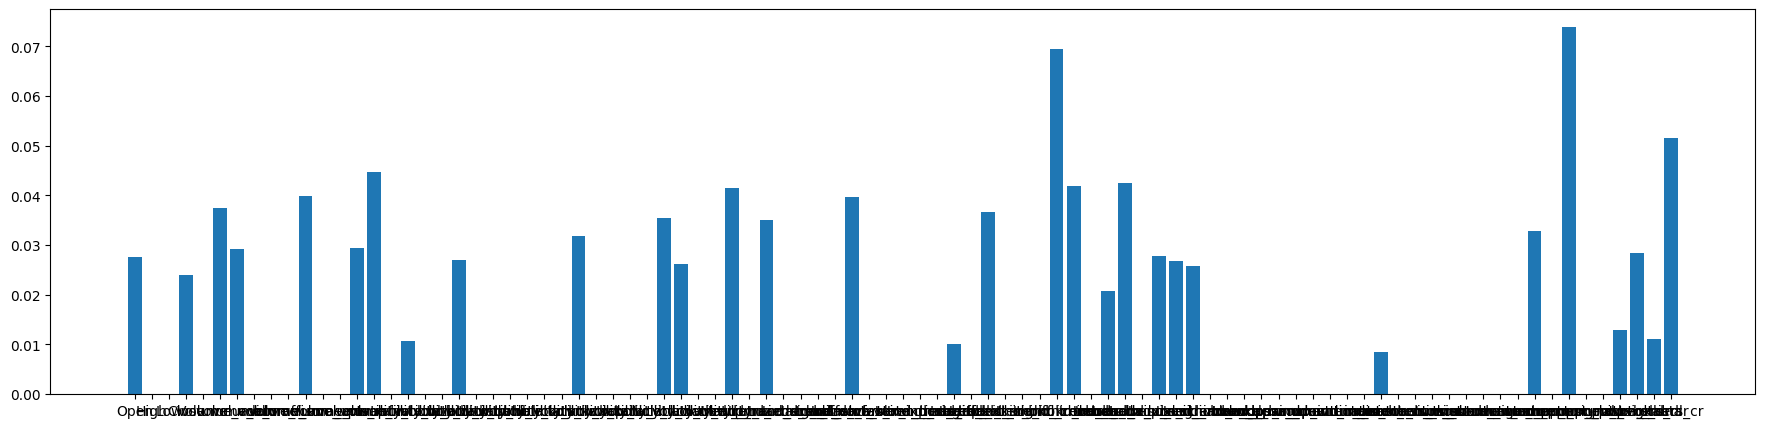

In [30]:
# Plot Feature Importances
fig = plt.figure(figsize=(22, 5))
importance_labels = X.columns
importance_features = classifier.feature_importances_
plt.bar(importance_labels, importance_features)
plt.show()

In [31]:
# Select Best Features
mean_feature_importance = importance_features.mean()
i = 0
recommended_feature_labels = []
recommended_feature_score = []
for fi in importance_features:
    if fi > mean_feature_importance:
        recommended_feature_labels.append(importance_labels[i])
        recommended_feature_score.append(fi)
    i += 1

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_1295/3002898103.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


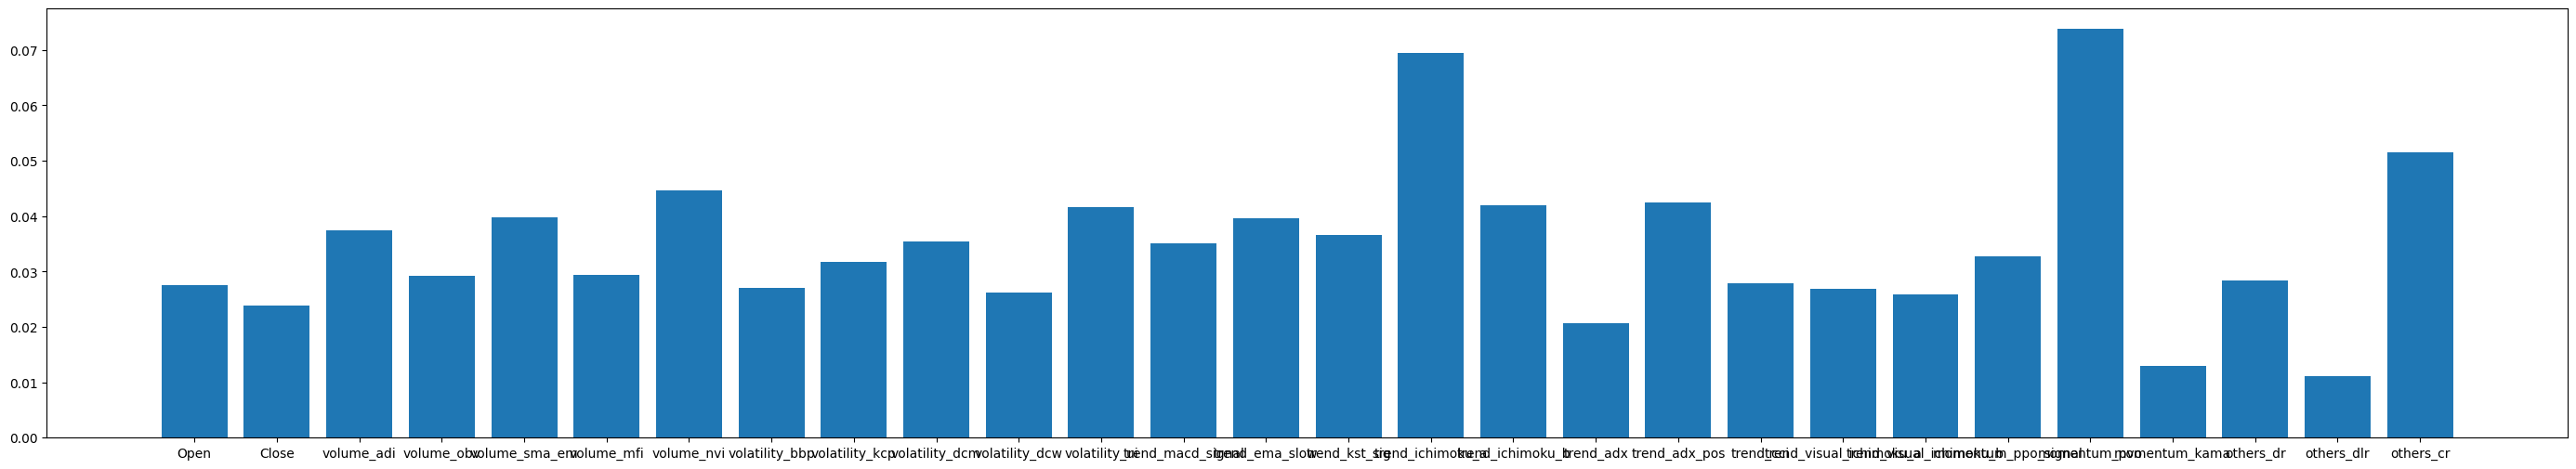

In [32]:
fig, ax = plt.subplots(figsize=(35, 6))

ax.bar(recommended_feature_labels, recommended_feature_score)
fig.show()